# Predicting Himalayan Expedition Success - Statistical Inference
***

## Introduction

The Himalayan Database ©, consists of records for all expeditions in the Nepal Himalayas from 1905 through 2018. The database covers expeditions to more than 450 significant peaks, including Everest, Cho Oyu and Kangchenjunga. The database is published by The Himalayan Database ©, a non-profit organization. For more information go to http://himalayandatabase.com/index.html.



### Datasets
Three datasets peaks.csv, expeditions.csv and members.csv have already been cleaned and joined into DF_Himalayas_Expeditions.csv for further visual analysis. 

This dataset is now loaded into a DataFrame for statistical analysis.

### Outcome

As a reminder, the data will be used to predict a member's success of a summitting a certain peak, during a certain time of year, with certain support mechanisms.  

## 1. Packages and setup

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from scipy.stats import ttest_ind_from_stats
from IPython.core.pylabtools import figsize

In [3]:
# Set workspace
pd.set_option('display.max_columns', 500)
# Set output charackters to 110 (not 79)
pd.options.display.width = 110
# To give multiple cell output. Not just the last command.
#InteractiveShell.ast_node_interactivity = 'last'

## 2. Load into DataFrame & Review questions to ask

In [4]:
# Load data as 'df'
df = pd.read_csv('DF_Himalayas_Expeditions.csv')
print('Shape:', df.shape)

Shape: (65315, 66)


The data loaded into df ('DF_Himalayas_Expeditions.csv') represents the population since it contains all data for expeditions in the given time frame.

Think of the following questions and apply them to your dataset:

- Are there variables that are particularly significant in terms of explaining the answer to your project question?
- Are there significant differences between subgroups in your data that may be relevant to your project aim?
- Are there strong correlations between pairs of independent variables or between an independent and a dependent variable?
- What are the most appropriate tests to use to analyze these relationships?

## 3. Hypothesis Tests 

The feature of interest is individual member success. It is important therefore to explore how other features affect the successful outcome of an individual member's summit.  
  
Most features here are binary in nature and is difficult to analyse. However, there are few discrete distributions worth investigating to see how they affect members' success to summit.

In [5]:
# Function to compare the success of members' success for given feature (col)
def ab_test(col, bins, describe, xlabel):
    '''Function to compare the success of members' success for given feature (col)'''
    
    # Look at success of members (msuccess) and the age (calcage)
    df_success = df[[col, 'msuccess']].copy()

    # Separate success/fails into series
    succ = pd.DataFrame(df[df['msuccess'] == 1][col])
    fail = pd.DataFrame(df[df['msuccess'] == 0][col])

    figsize(8, 5)
    sns.set()

    # Plot successful summits with statistics
    #ax = succ.plot(kind='hist', bins=bins, alpha=0.5, label='successful summit')
    ax = sns.distplot(succ[col], bins=bins, label='successful summit')
    #ax = plt.title(describe + ' distribution for successful summits')
    #ax = plt.xlabel(xlabel)
    ax = plt.axvline(np.mean(succ[col]), c='C0', ls='--', lw=2, label='mean')

    # Plot unsuccessful summits with statistics

    #ax = fail.plot(kind='hist', bins=bins, alpha=0.5, label='did not summit')
    ax = sns.distplot(fail[col], bins=bins, label='did not summit')
    ax = plt.title(describe + ' distribution for summits')
    ax = plt.xlabel(xlabel)
    ax = plt.ylabel('Count (normalised)')
    ax = plt.axvline(np.mean(fail[col]), c='C1', ls='--', lw=2, label='mean')
    ax = plt.legend()

    # Mean and Std
    print('Succ Mean = %.2f' % np.mean(succ[col]), ', Std = %.2f' % np.std(succ[col]))
    print('Fail Mean = %.2f' % np.mean(fail[col]), ', Std = %.2f' % np.std(fail[col]))

    # t-test and t-statistic
    print('Assuming similar sample variations: ', ttest_ind(fail[col], succ[col]))

### 3.1 Effect of a member's age on summit success

Investigate if there is a significant difference in age between people that successfully summitted and those that didn't.  
  
H0: There is no difference between the mean age of successful and failed summits. (mu_fail - mu_succ = 0)  
Ha: The mean age for members who successfully summited is different than members that did not summit.  
  
Approach the hypothesis as comparing the mean of 2 samples and assuming equal variances. 

Succ Mean = 35.26 , Std = 9.73
Fail Mean = 37.02 , Std = 10.85
Assuming similar sample variations:  Ttest_indResult(statistic=20.485932498009156, pvalue=5.642262600541117e-93)


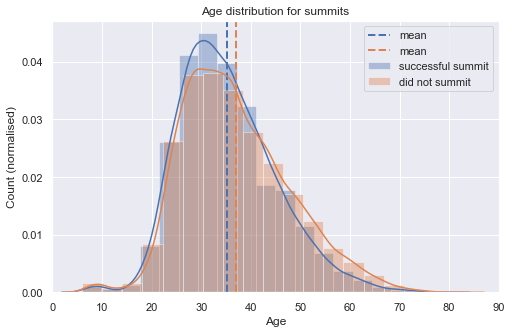

In [6]:
ab_test('calcage', bins=19, describe='Age', xlabel='Age')
ax = plt.xlim(0, 90)

The t-statistic is much larger than the t-test, so we can safely reject the H0.   
There is a significant difference in the mean of the age between members that summitted successfully and members that did not. In fact, members that summitted successfully are younger than members that didn't.  
  
To be sure, see additional methods to get the t-test and t-statistics. Note the low p-values.

In [7]:
# Separate success/fails into series
age_succ = pd.DataFrame(df[df['msuccess'] == 1]['calcage'])
age_fail = pd.DataFrame(df[df['msuccess'] == 0]['calcage'])


# Parameters
n_succ = len(age_succ)
n_fail = len(age_fail)
mu_succ = np.mean(age_succ['calcage'])
mu_fail = np.mean(age_fail['calcage'])
std_succ = np.std(age_succ['calcage'])
std_fail = np.std(age_fail['calcage'])

# Degrees of freedom
dof = n_succ + n_fail - 2

# t
t_test = t.ppf(df=dof, q=0.975)

# Sp
sp = np.sqrt((((n_fail - 1)*std_fail**2) + ((n_succ - 1)*std_succ**2)) / dof)

# t-statistic
t_stat = (mu_fail - mu_succ) / (sp*np.sqrt(1/n_fail + 1/n_succ))

# Print
print('t-test = %.2f' % t_test, ', t-statistic = %.2f' % t_stat)

t-test = 1.96 , t-statistic = 20.49


In [8]:
print('Assuming similar sample variations: ', ttest_ind(age_fail['calcage'], age_succ['calcage']))
print('Assuming different sample variations: ', \
      ttest_ind_from_stats(mu_fail, std_fail, n_fail, mu_succ, std_succ, n_succ))

Assuming similar sample variations:  Ttest_indResult(statistic=20.485932498009156, pvalue=5.642262600541117e-93)
Assuming different sample variations:  Ttest_indResult(statistic=20.486236197015636, pvalue=5.607408189315421e-93)


### 3.2 Effect of an expedition's size (number of members) on summit success

Investigate if there is a significant difference in expedition group size between people that successfully summitted and those that didn't.  
  
H0: There is no difference between the mean expedition group size of successful and failed summits. (mu_fail - mu_succ = 0)  
Ha: The mean group size for members who successfully summited is different than members that did not summit.  
  
Approach the hypothesis as comparing the mean of 2 samples and assuming equal variances. 

Succ Mean = 10.23 , Std = 8.64
Fail Mean = 10.52 , Std = 8.79
Assuming similar sample variations:  Ttest_indResult(statistic=3.989379114073694, pvalue=6.631863027111122e-05)


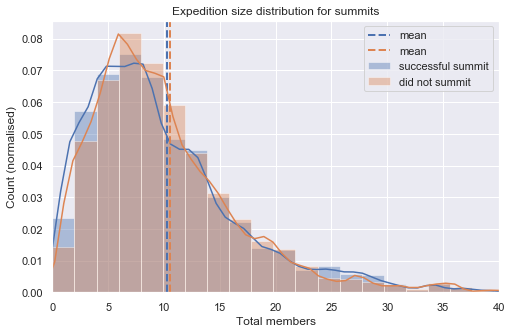

In [9]:
ab_test('totmembers', bins=50, describe='Expedition size', xlabel='Total members')
ax = plt.xlim(0, 40)

The t-statistic is much larger than the t-test, so we can safely reject the H0.   
There is a significant difference in the mean of expedition group size between members that summitted successfully and members that did not. In fact, members that summitted successfully were in smaller groups than members that didn't.  

### 3.3 Effect of the number of guides hired per expedition on summit success

Investigate if there is a significant difference in the number of guides hired per expedition between people that successfully summitted and those that didn't.  
  
H0: There is no difference between the mean number of guides hired per expedition of successful and failed summits. (mu_fail - mu_succ = 0)  
Ha: The mean number of guides hired per expedition for members who successfully summited is different than members that did not summit.  
  
Approach the hypothesis as comparing the mean of 2 samples and assuming equal variances. 

Succ Mean = 6.09 , Std = 8.85
Fail Mean = 5.14 , Std = 9.46
Assuming similar sample variations:  Ttest_indResult(statistic=-12.509332703326677, pvalue=7.297824617164875e-36)


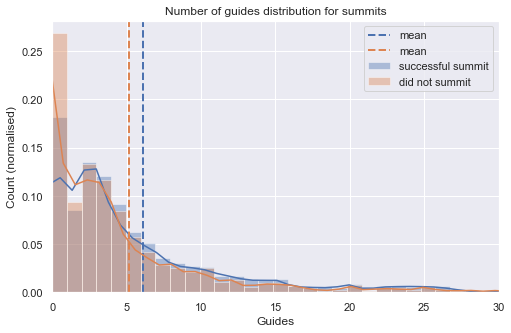

In [10]:
ab_test('tothired', bins=100, describe='Number of guides', xlabel='Guides')
ax = plt.xlim(0, 30)

The t-statistic is much larger than the t-test, so we can safely reject the H0.   
There is a significant difference in the mean of number of guides hired per expedition between members that summitted successfully and members that did not. In fact, members that summitted successfully generally had more guides than members that didn't.  

### 3.4 Effect of when a member attempted the expdition (how recent), on summit success

Investigate if there is a significant difference in when a member summited (recent or past) between people that successfully summitted and those that didn't.  
  
H0: There is no difference between the mean of when members summited for successful and failed summits. (mu_fail - mu_succ = 0)  
Ha: When, or how recent members successfully summited is different than members that did not summit.  
  
Approach the hypothesis as comparing the mean of 2 samples and assuming equal variances. 

Succ Mean = 2000.95 , Std = 12.16
Fail Mean = 1995.98 , Std = 14.87
Assuming similar sample variations:  Ttest_indResult(statistic=-43.26894553358994, pvalue=0.0)


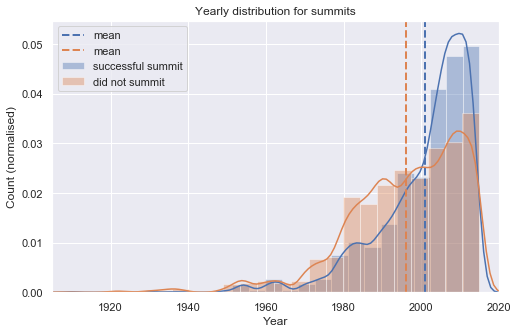

In [11]:
ab_test('year', bins=25, describe='Yearly', xlabel='Year')
ax = plt.xlim(1905, 2020)

The t-statistic is much larger than the t-test, so we can safely reject the H0.   
There is a significant difference in successful summits depending on when, or how recent the expedition took place. In fact, members are more likely to successfully summit today than previously. 

Succ Mean = 0.59 , Std = 0.49
Fail Mean = 0.37 , Std = 0.48
Assuming similar sample variations:  Ttest_indResult(statistic=-54.78933037406944, pvalue=0.0)


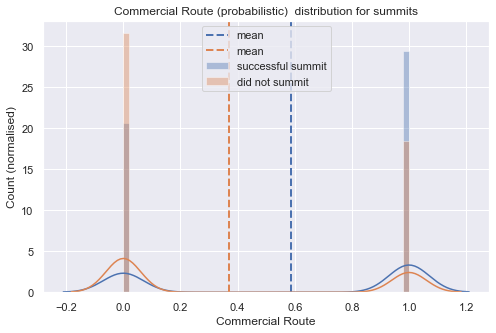

In [23]:
ab_test('comrte', bins=50, describe='Commercial Route (probabilistic) ', xlabel='Commercial Route')
plt.legend(loc='upper center')

## 4. Explore correlations

Explore any correlations.

In [13]:
# Plot and determine pearson coefficient between two features
def corr(x, y, xlabel, ylabel, title):
    '''Plot and determine pearson coefficient between two features'''
    sns.set()
    figsize(12, 10)
    df.plot(x=x, y=y, kind='scatter', linewidth=1)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    m, c = np.polyfit(df[x], df[y], deg=1)
    x_l = np.arange(df[x].min(), df[x].max())
    y_l = m*x_l + c
    plt.plot(x_l, y_l, color='k', linewidth=3)
    pearson_r = pearsonr(df[x], df[y])
    print('Pearson coefficient = %.4f ' % pearson_r[0])
    

### 4.1 Correlation between member age and summit height attempted

Is there a negative correlation between summits that members choose to summit and their age. In other words, do younger members choose to summit higher peaks?

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Pearson coefficient = -0.0268 


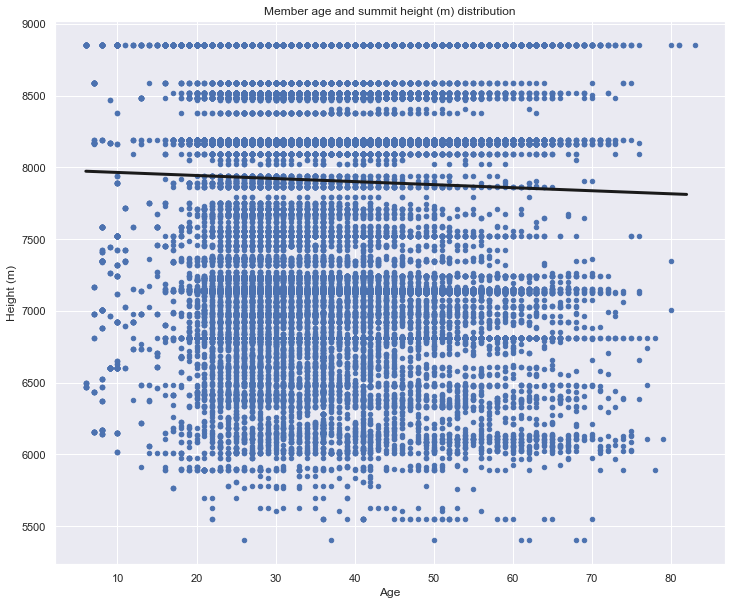

In [14]:
corr(x='calcage', y='heightm', xlabel='Age', ylabel='Height (m)', title='Member age and summit height (m) distribution')

From the graph it seem obvious that there is no negative correlation evident. The low pearson coefficient indicates proves this.

### 4.2 Correlation between year of summit and summit height attempted

Is there a correlation between the year a summit was attempted and the height of that summit? In other words, did people attempt increasingly heigher mountain peaks over the years?

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Pearson coefficient = 0.0841 


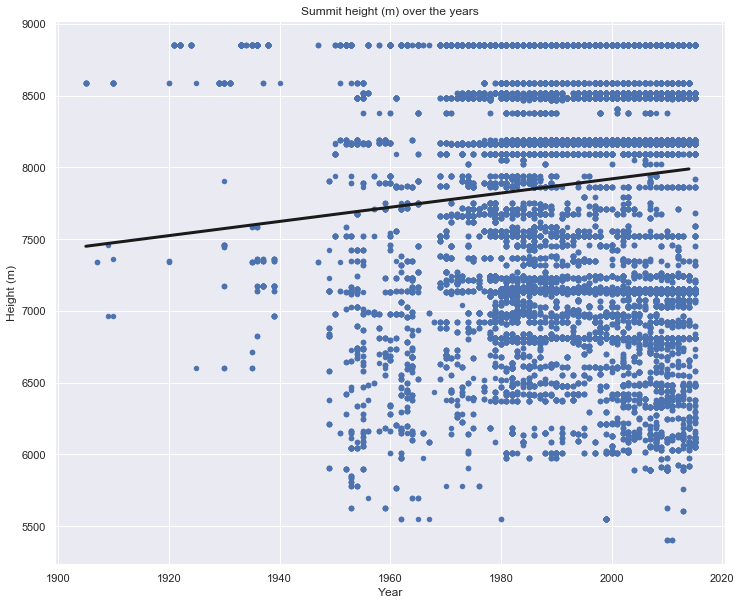

In [15]:
corr(x='year', y='heightm', xlabel='Year', ylabel='Height (m)', title='Summit height (m) over the years')

From the graph it seem obvious that there is barely any correlation evident. The low pearson coefficient indicates proves this.

### 4.3 Correlation between year of summit and member age

Is there a correlation between the a member's age and the year the summit was attempted? In other words, did the age of members attempting a summit increase over the years?

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Pearson coefficient = 0.2773 


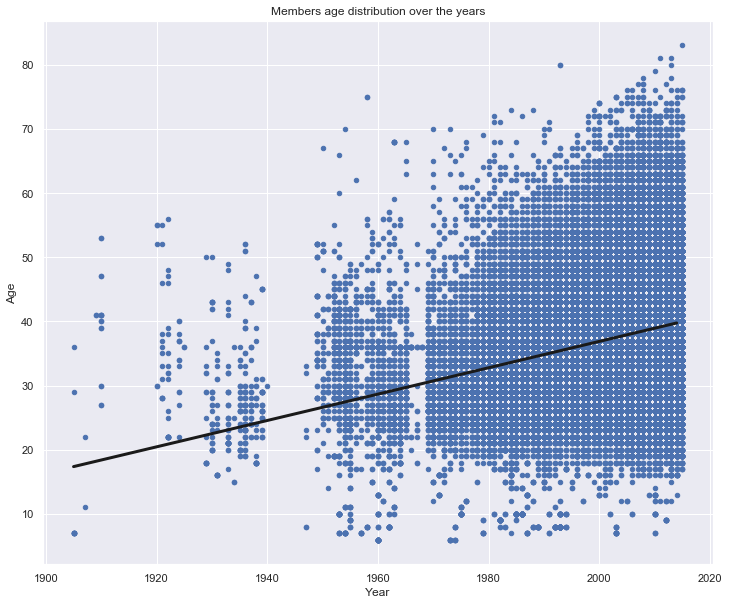

In [16]:
corr(x='year', y='calcage', xlabel='Year', ylabel='Age', title='Member''s age distribution over the years')

The graph point out that there is some positive correlation evident.

## 4.4 Correlation Matrix

With help from https://seaborn.pydata.org/examples/many_pairwise_correlations.html

Text(0.5, 1, 'Feature Correlation Matrix')

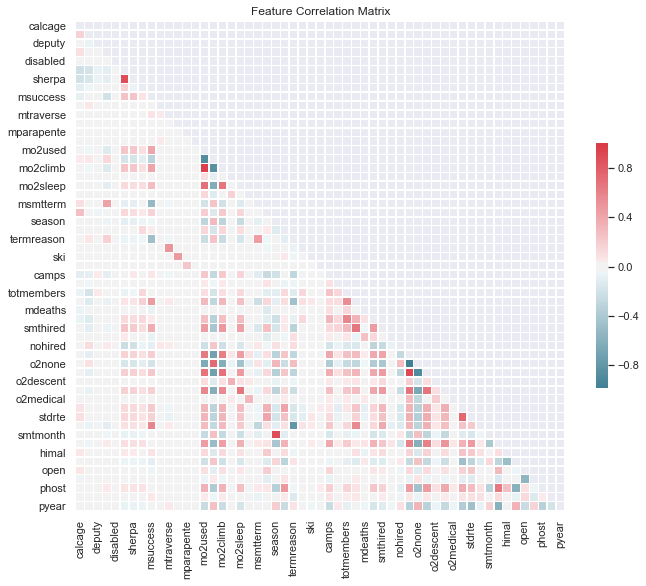

In [67]:
# Generate a mask for the upper triangle
mask = np.zeros_like(correl, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correl, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .5})

plt.title('Feature Correlation Matrix')